In [75]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
mean_01 = np.array([0.1, 0.2])
mean_02 = np.array([5.1, 5.2])

cov_01 = np.array([[9.0, 0.2],
                  [0.2, 1.1]])
cov_02 = np.array([[13.0, 0.3],
                  [0.3, 1.1]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 1000)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 1000)

print dist_01.shape, dist_02.shape

(1000, 2) (1000, 2)


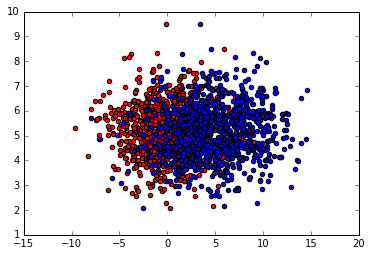

In [98]:
plt.figure(0)

plt.scatter(dist_01[:, 0], dist_02[:, 1], c='red')
plt.scatter(dist_02[:, 0], dist_02[:, 1])

In [99]:
#total dataset

rows = dist_01.shape[0] + dist_02.shape[0]
cols = dist_01.shape[1] + 1

data = np.zeros((rows, cols))
print data.shape

data[:dist_01.shape[0], :dist_01.shape[1]] = dist_01
data[dist_01.shape[0]:, :dist_01.shape[1]] = dist_02
data[dist_01.shape[0]:, -1] = 1.0

(2000, 3)


In [100]:
np.random.shuffle(data)
data[:10]

array([[ 1.95081623, -0.08610899,  0.        ],
       [-3.42882029, -0.72288796,  0.        ],
       [ 4.015914  ,  5.60601985,  1.        ],
       [ 1.5911515 ,  0.35158012,  0.        ],
       [ 4.7902073 ,  0.04678864,  0.        ],
       [-4.2740004 ,  0.77997957,  0.        ],
       [ 0.33269363,  0.22926725,  0.        ],
       [ 4.27804208, -0.96468555,  0.        ],
       [ 2.38221693,  4.82315944,  1.        ],
       [-1.23116997,  0.86485499,  0.        ]])

In [101]:
split = int(0.8*data.shape[0])

X_train = data[:split, :dist_01.shape[1]]
y_train = data[:split, -1]

X_test = data[split:, :dist_01.shape[1]]
y_test = data[split:, -1]

print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(1600, 2) (1600,)
(400, 2) (400,)


In [63]:
def sigmoid(f):
    return 1/(1+np.exp(-1*f))

def hypothesis(x, w, b):
    h = (x*w).sum() + b
    return sigmoid(h)

def get_error(x, w, y, b):
    err = 0.0
    m = x.shape[0]
    
    for ix in range(m):
        if y[ix] == 0:
            add_term = -1*(np.log(1 - hypothesis(x[ix], w, b)))
            err+=add_term
        else:
            add_term = -1*(np.log(hypothesis(x[ix], w, b)))
            err+=add_term
    
    err = err/m
    
    return err

In [64]:
def get_gradients(x, w, y, b):
    
    grad_w = np.zeros(w.shape[0])
    grad_b = 0.0
    
    m = x.shape[0]
    
    for ix in range(m):
        grad_w += (hypothesis(x[ix], w, b) - y[ix])*(x[ix])
        grad_b += (hypothesis(x[ix], w, b) - y[ix])*(1)
        
    return [grad_w, grad_b]

In [65]:
def optimizer(x, w, y, b, learning_rate = 0.001):
    error = get_error(x, w, y, b)
    
    [grad_w, grad_b] = get_gradients(x, w, y, b)
    
    b = b - learning_rate*grad_b
    w = w - learning_rate*grad_w
    
    return error, w, b

In [66]:
def logistic_regression(X_train, y_train, nb_epoch=50, learning_rate = 0.01):
    
    loss = []
    #parameter initialization
    W = np.array([0.3, 0.2])
    b = 3.6
    
    for ix in range(nb_epoch):
        error, W, b = optimizer(X_train, W, y_train, learning_rate)
        loss.append(error)
    
    W_final = W
    b_final = b
    
    return loss, W_final, b_final

In [67]:
loss, W_final, b_final = logistic_regression(X_train, y_train)

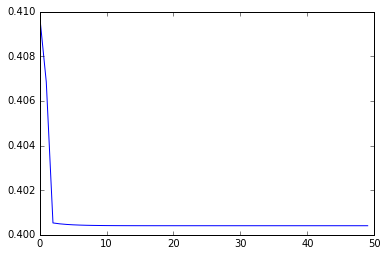

In [68]:
plt.plot(loss)

In [69]:
print W_final, b_final


[ 0.43984125  0.24331855] -0.375448999868


In [70]:
loss[-1]

0.40040693471059741

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
lr = LogisticRegression()

In [104]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [105]:
lr.score(X_test, y_test)

0.99250000000000005